<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PartII/blob/master/p277_%EC%A7%80%EB%8F%84%EA%B3%B5%EA%B0%84%EA%B8%B0%EB%B2%95%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch08.4 지도공간 기법 시각화

In [ ]:
## ggmap 페키지는 Googel Maps, Stamen Maps, Naver Map 등의 
## 다양한 온라인 소스로부터 가져온 정적인 지도 위에 특별한 데이터나 모형을 시각화하는 함수

In [10]:
library(ggplot2)

In [11]:
install.packages("ggmap")
library(ggmap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



Source : http://tile.stamen.com/terrain/14/13968/6344.png

Source : http://tile.stamen.com/terrain/14/13969/6344.png

Source : http://tile.stamen.com/terrain/14/13970/6344.png

Source : http://tile.stamen.com/terrain/14/13968/6345.png

Source : http://tile.stamen.com/terrain/14/13969/6345.png

Source : http://tile.stamen.com/terrain/14/13970/6345.png



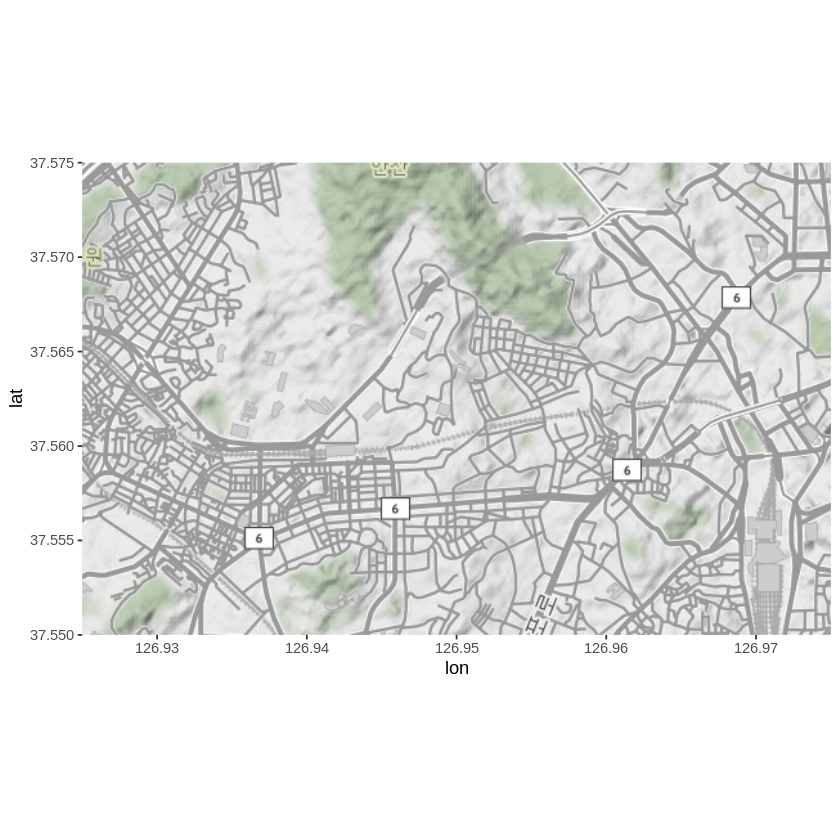

In [12]:
## 서울 지역의 중심 좌표 설정
# seoul <- c(left=126.77, bottom=37.40, right=127.17, top=37.70)
# seoul <- c(left=126.9, bottom=37.5, right=127.00, top=37.6)
seoul <- c(left=126.925, bottom=37.55, right=126.975, top=37.575)
## staman.com 서버에서 지도 이미지를 가져옴
## zoom : 10 ~ 
## maptype : toner, terrain, watercolor
# map <- get_stamenmap(seoul, zoom = 12, maptype = 'terrain')    # 지형
# map <- get_stamenmap(seoul, zoom = 12, maptype = 'toner')      # 흑백 지도 
# map <- get_stamenmap(seoul, zoom = 12, maptype = 'watercolor') # 물을 강조
# map <- get_stamenmap(seoul, zoom = 10, maptype = 'terrain')
map <- get_stamenmap(seoul, zoom = 14, maptype = 'terrain')
ggmap(map)

In [2]:
## 2019년 1월 대한민국 인구수를 기준으로 지역별 인구수 표시하기
# 1) 데이터셋 가져오기
pop <- read.csv(file = "population201901.csv", header = T, fileEncoding = "CP949", encoding = "UTF-8")
# pop <- read.csv("https://raw.githubusercontent.com/gyujin0450/dataset/master/population201901.csv", header = T, )

In [3]:
str(pop)

'data.frame':	18 obs. of  7 variables:
 $ 지역명    : chr  "서울특별시  " "부산광역시  " "대구광역시  " "인천광역시  " ...
 $ LAT       : num  37.6 35.2 35.9 37.5 35.2 ...
 $ LON       : num  127 129 129 127 127 ...
 $ 총인구수  : chr  "9,766,288" "3,438,259" "2,460,382" "2,955,916" ...
 $ 남자인구수: chr  "4,772,822" "1,690,527" "1,218,478" "1,482,441" ...
 $ 여자인구수: chr  "4,993,466" "1,747,732" "1,241,904" "1,473,475" ...
 $ 세대수    : chr  "4,271,551" "1,481,315" "1,022,727" "1,216,126" ...


In [4]:
library(stringr)

In [5]:
region <- pop$`지역명`
lon <- pop$LON
lat <- pop$LAT
tot_pop <- as.numeric(str_replace_all(pop$`총인구수`,',',''))

In [6]:
# 위도, 경도, 세대수 이용 데이터프레임 생성
df <- data.frame(region, lon, lat, tot_pop)
df 

region,lon,lat,tot_pop
<chr>,<dbl>,<dbl>,<dbl>
서울특별시,126.9895,37.56510,9766288
부산광역시,129.0447,35.16277,3438259
대구광역시,128.5667,35.87975,2460382
인천광역시,126.7052,37.45622,2955916
광주광역시,126.8515,35.16008,1459832
대전광역시,127.3888,36.37310,1488725
울산광역시,129.3114,35.53874,1154786
세종특별자치시,127.2908,36.48086,316814
경기도,127.5293,37.42184,13090648


In [7]:
df <- df[1:17,] # tot 제외
df

,region,lon,lat,tot_pop
,<chr>,<dbl>,<dbl>,<dbl>
1,서울특별시,126.9895,37.56510,9766288
2,부산광역시,129.0447,35.16277,3438259
3,대구광역시,128.5667,35.87975,2460382
4,인천광역시,126.7052,37.45622,2955916
5,광주광역시,126.8515,35.16008,1459832
6,대전광역시,127.3888,36.37310,1488725
7,울산광역시,129.3114,35.53874,1154786
8,세종특별자치시,127.2908,36.48086,316814
9,경기도,127.5293,37.42184,13090648


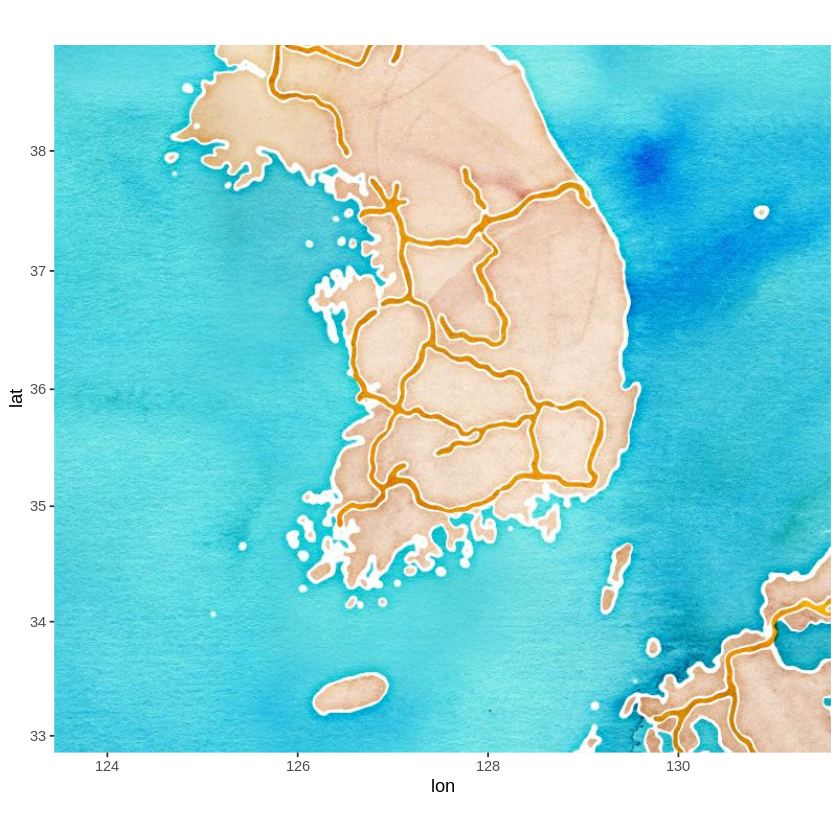

In [14]:
# 정적 지도 이미지 가져오기
daegu <- c(left = 123.4423013, bottom = 32.8528306, right = 131.601445, top = 38.8714354)
map <- get_stamenmap(daegu, zoom = 7, maptype = 'watercolor')
layer1 <- ggmap(map)
layer1

Warning message:
“Using size for a discrete variable is not advised.”


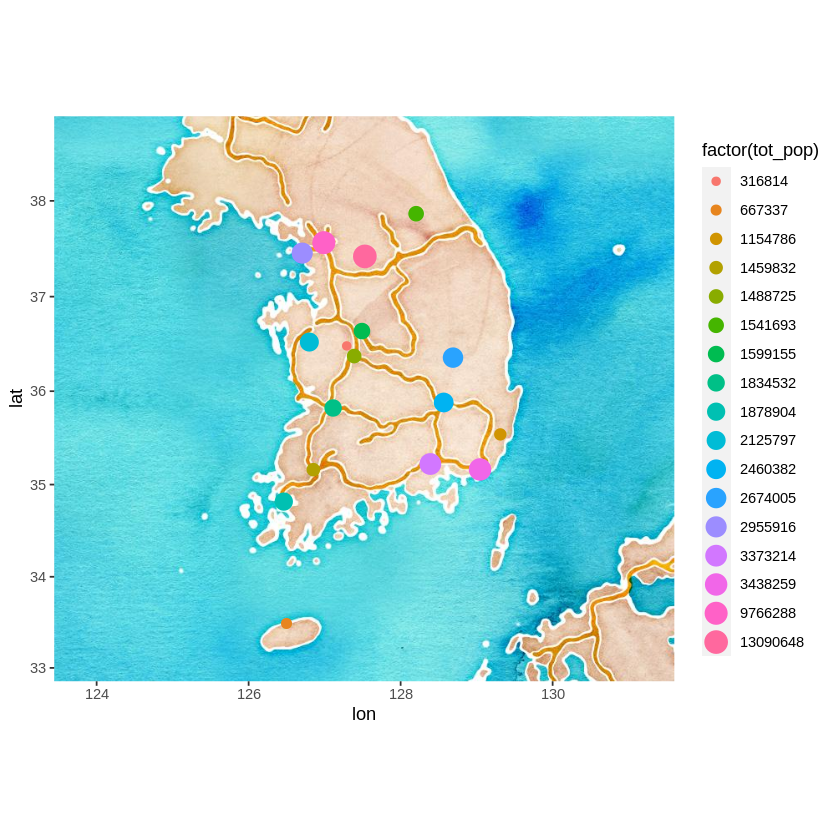

In [17]:
layer2 <- layer1 + geom_point(data=df, aes(x=lon, y=lat, color = factor(tot_pop), size = factor(tot_pop)))
layer2

Warning message:
“Using size for a discrete variable is not advised.”


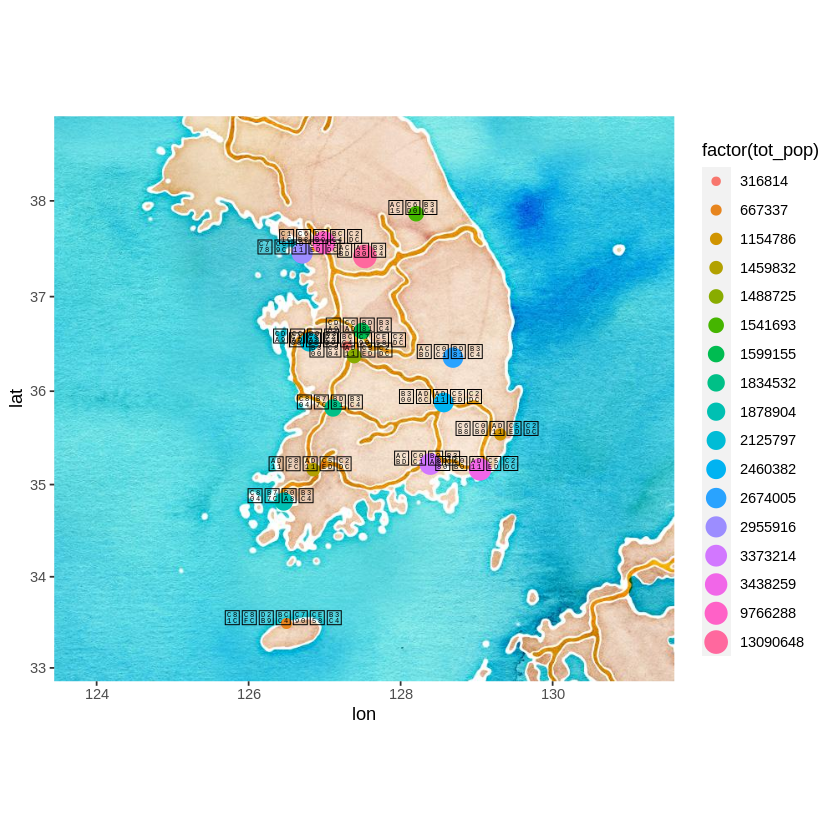

In [18]:
layer3 <- layer2 + geom_text(data = df, aes(x = lon + 0.01, y = lat + 0.08, label = region), size = 3)
layer3

In [19]:
## 크기를 지정하여 파일 저장
ggsave("pop201901.png", scale = 1, width = 10.24, height = 7.68)

Warning message:
“Using size for a discrete variable is not advised.”
